# How song and album lengths changed between 2008–2022

Investigating the change in song and album lengths between 2008–2022, during which time streaming took off. Inspired by conversations with friends, the 15 year anniversary of Spotify's platform launch, and this [Pitchfork feature](https://pitchfork.com/features/lists-and-guides/are-rap-albums-really-getting-longer/) investigating rap album lengths.

In [67]:
## Initialising packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data collection

This analysis uses data from the Billboard charts. I used this data as the US is the world's largest music market and the chart data could be found on Billboard's website.

For singles, I took the top 10 songs from 2008 to 2022 from the Billboard Hot 100 year-end charts [found here](https://www.billboard.com/charts/year-end/2008/hot-100-songs/).

For albums, I took the top 10 albums from 2008 to 2022 from the Billboard 200 year-end charts [found here](https://www.billboard.com/charts/year-end/2008/top-billboard-200-albums/).

Song lengths of singles were taken from Spotify and checked with Wikipedia to make sure they were the single version rather than radio edit or album version.

For album runtime and tracklists, I took the information from Wikipedia. Where there were multiple versions, I went with the album runtime and tracklist found on Spotify. These were often the deluxe editions which are longer with extra tracks included. I also cross-referenced Discogs to make sure the edition was released in the USA and checked it was released before or during the year it charted.

There were some small differences in song lengths and album runtimes between Spotify and Wikipedia.

Any inaccuracies in the data are my bad, so please call me out if necessary.

## The data

In [68]:
## Import datasets
topsongs = pd.read_csv('yearlyhot100.csv')
topalbums = pd.read_csv('topalbums.csv')

In [69]:
## Checking the singles dataset
topsongs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   artist         150 non-null    object
 1   song           150 non-null    object
 2   charting_year  150 non-null    int64 
 3   length         150 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.8+ KB


In [70]:
topsongs.head()

,artist,song,charting_year,length
0,Flo Rida feat. T-Pain,Low,2008,0:03:51
1,Leona Lewis,Bleeding Love,2008,0:04:22
2,Alicia Keys,No One,2008,0:04:14
3,Lil Wayne feat. Static Major,Lollipop,2008,0:04:59
4,Timbaland feat. OneRepublic,Apologize,2008,0:03:04


In [71]:
## Checking the albums dataset
topalbums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   artist         150 non-null    object 
 1   album          150 non-null    object 
 2   release_year   150 non-null    int64  
 3   charting_year  150 non-null    int64  
 4   runtime        150 non-null    object 
 5   tracks         150 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 7.2+ KB


In [72]:
topalbums.head()

,artist,album,release_year,charting_year,runtime,tracks
0,Alicia Keys,As I Am,2007,2008,1:08:08,17.0
1,Josh Groban,Noel,2007,2008,0:56:01,13.0
2,Lil Wayne,Tha Carter III,2008,2008,1:47:00,23.0
3,Eagles,Long Road Out Of Eden,2007,2008,1:35:00,21.0
4,Taylor Swift,Taylor Swift,2006,2008,0:53:29,15.0


## Data cleaning

In [73]:
## Converting the length column to minutes for song data
topsongs['length'] = pd.to_timedelta(topsongs['length'])
topsongs['length'] = topsongs['length'].dt.seconds / 60
topsongs.head()

,artist,song,charting_year,length
0,Flo Rida feat. T-Pain,Low,2008,3.850000
1,Leona Lewis,Bleeding Love,2008,4.366667
2,Alicia Keys,No One,2008,4.233333
3,Lil Wayne feat. Static Major,Lollipop,2008,4.983333
4,Timbaland feat. OneRepublic,Apologize,2008,3.066667


In [74]:
## Converting the runtime column to minutes for album data
topalbums['runtime'] = pd.to_timedelta(topalbums['runtime'])
topalbums['runtime'] = topalbums['runtime'].dt.seconds / 60
topalbums.head()

,artist,album,release_year,charting_year,runtime,tracks
0,Alicia Keys,As I Am,2007,2008,68.133333,17.0
1,Josh Groban,Noel,2007,2008,56.016667,13.0
2,Lil Wayne,Tha Carter III,2008,2008,107.000000,23.0
3,Eagles,Long Road Out Of Eden,2007,2008,95.000000,21.0
4,Taylor Swift,Taylor Swift,2006,2008,53.483333,15.0


## Analysis

### Single length

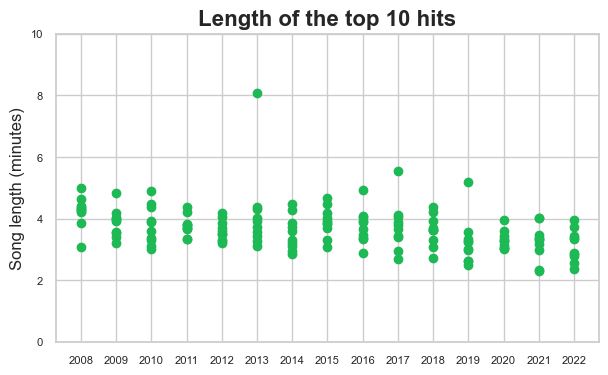

In [75]:
## Plotting the song length of the top 10 singles
fig, ax = plt.subplots()

plt.scatter(x='charting_year', y='length', data=topsongs, color='#1DB954', marker='o')
fig.set_size_inches(7, 4)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica Neue']
plt.xticks(np.arange(2008, 2023, 1.0))
plt.ylim(0, 10)

plt.title('Length of the top 10 hits', fontweight='bold', fontsize=16)
plt.ylabel('Song length (minutes)', fontsize=12)
ax.tick_params(labelsize=8)

sns.set(style='whitegrid')

In [76]:
## Finding the min and max values
topsongs.loc[topsongs['length'].idxmin()]

artist                                Lil Nas X
song             Montero (Call Me By Your Name)
charting_year                              2021
length                                 2.283333
Name: 138, dtype: object

In [77]:
topsongs.loc[topsongs['length'].idxmax()]

artist           Justin Timberlake
song                       Mirrors
charting_year                 2013
length                    8.066667
Name: 55, dtype: object

In [78]:
## Calculating the mean song length each year
meansinglelength = topsongs.groupby(['charting_year'],as_index=False)['length'].mean()
meansinglelength

,charting_year,length
0,2008,4.235000
1,2009,3.858333
2,2010,3.800000
3,2011,3.770000
4,2012,3.616667
5,2013,4.176667
6,2014,3.541667
7,2015,3.905000
8,2016,3.760000
9,2017,3.755000


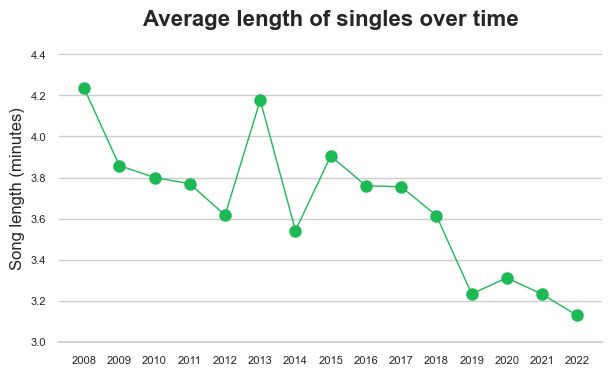

In [79]:
## Plotting average single length over time on a line chart
fig, ax = plt.subplots()

meansinglelength.plot(x = 'charting_year', y = 'length', linewidth=1.0, c='#1DB954', marker='o', markeredgewidth=3, ax=ax)
fig.set_size_inches(7, 4)
plt.xticks(np.arange(2008, 2023, 1.0))
plt.ylim(3, 4.5)

plt.title('Average length of singles over time',fontweight='bold', fontsize=16)
plt.xlabel('')
plt.ylabel('Song length (minutes)', fontsize=12)
ax.tick_params(labelsize=8)
plt.legend('', frameon=False)

sns.set(style='whitegrid')
ax.xaxis.grid(False)
sns.despine(left=True)

From 4 minutes and 14 seconds in 2008 to 3 minutes and 8 seconds in 2022, popular songs have shortened by over a minute on average.

The longest song that made it to the top 10 was Justin Timberlake's Mirrors that was released in 2013. Meanwhile, Lil Nas X's 2021 hit Montero (Call Me By Your Name) was the shortest at 2 minutes and 17 seconds.

### Album track length

In [80]:
## Adding average song length column to album data
topalbums['avg_song_length'] = topalbums['runtime'] / topalbums['tracks']

In [81]:
## Calculating mean song length per year
meansonglength = topalbums.groupby(['charting_year'],as_index=False)['avg_song_length'].mean()
meansonglength

,charting_year,avg_song_length
0,2008,4.163478
1,2009,3.876194
2,2010,4.002678
3,2011,4.143807
4,2012,3.897333
5,2013,4.016960
6,2014,3.706439
7,2015,3.871817
8,2016,3.852330
9,2017,3.666942


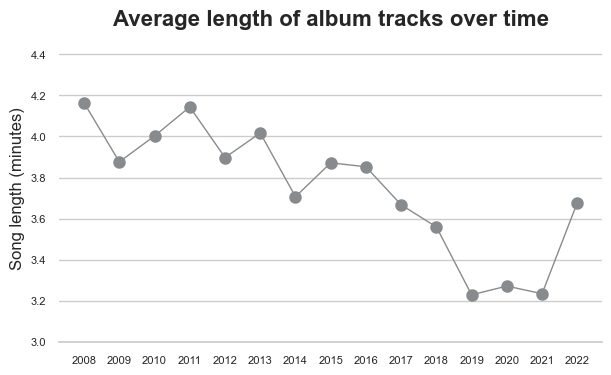

In [82]:
## Plotting average album song length over time on a line chart
fig, ax = plt.subplots()

meansonglength.plot(x = 'charting_year', y = 'avg_song_length', linewidth=1.0, c='#888b8d', marker='o', markeredgewidth=3, ax=ax)
fig.set_size_inches(7, 4)
plt.xticks(np.arange(2008, 2023, 1.0))
plt.ylim(3, 4.5)

plt.title('Average length of album tracks over time', fontweight='bold', fontsize=16)
plt.xlabel('')
plt.ylabel('Song length (minutes)', fontsize=12)
plt.legend('', frameon=False)
ax.tick_params(labelsize=8)

sns.set(style='whitegrid')
ax.xaxis.grid(False)
sns.despine(left=True)

When it comes to the song lengths of album tracks, there's a similar shortening trend. The average song length on albums was 4 minutes and 10 seconds in 2008. In 2019, it hit a low of 3 minutes and 14 seconds, remaining around this mark until 2022 when it increased to 3 minutes and 41 seconds.

### Comparing average song lengths of singles vs. album tracks

In [83]:
## Combining the data frames
allsonglengths = pd.merge(meansinglelength, meansonglength)
allsonglengths

,charting_year,length,avg_song_length
0,2008,4.235000,4.163478
1,2009,3.858333,3.876194
2,2010,3.800000,4.002678
3,2011,3.770000,4.143807
4,2012,3.616667,3.897333
5,2013,4.176667,4.016960
6,2014,3.541667,3.706439
7,2015,3.905000,3.871817
8,2016,3.760000,3.852330
9,2017,3.755000,3.666942


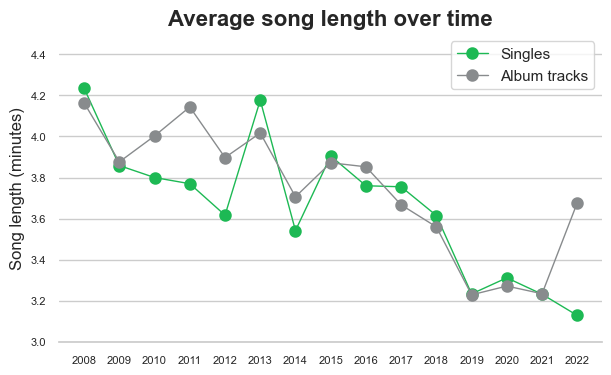

In [84]:
## Plotting comparisons of average single and album track length over time on a line chart
fig, ax = plt.subplots()

allsonglengths.plot(x = 'charting_year', y = 'length', linewidth=1.0, c='#1DB954', marker='o', markeredgewidth=3, ax=ax)
allsonglengths.plot(x = 'charting_year', y = 'avg_song_length', linewidth=1.0, c='#888b8d', marker='o', markeredgewidth=3, ax=ax)
fig.set_size_inches(7, 4)
plt.xticks(np.arange(2008, 2023, 1.0))
plt.ylim(3, 4.5)

plt.title('Average song length over time', fontweight='bold', fontsize=16)
plt.xlabel('')
plt.ylabel('Song length (minutes)', fontsize=12)
ax.legend(['Singles', 'Album tracks'])
ax.tick_params(labelsize=8)

sns.set(style='whitegrid')
ax.xaxis.grid(False)
sns.despine(left=True)

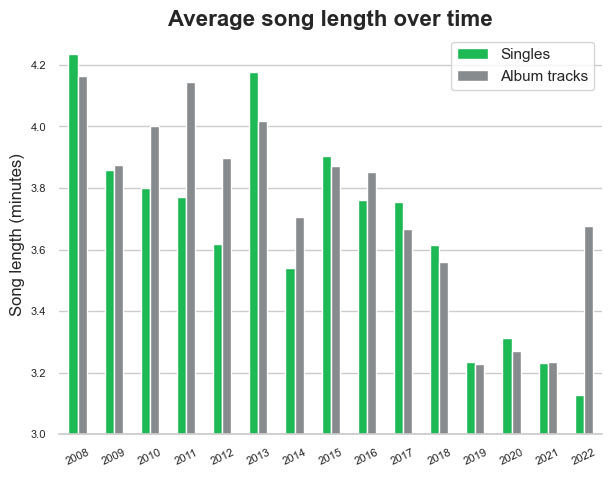

In [85]:
## Plotting comparisons of average single and album track length over time on a bar chart
color_scheme = ['#1DB954', '#888b8d']

fig, ax = plt.subplots()
fig.set_size_inches(7, 4)
allsonglengths.plot(kind='bar', x='charting_year', stacked=False, ax=ax, color=color_scheme)
plt.ylim(3, 4.3)

plt.title('Average song length over time', fontweight='bold', fontsize=16)
plt.xlabel('')
plt.ylabel('Song length (minutes)', fontsize=12)
ax.legend(['Singles', 'Album tracks'])
ax.tick_params(labelsize=8)
plt.xticks(rotation = 25)

plt.subplots_adjust(bottom=0, top =1)

sns.set(style='whitegrid')
ax.xaxis.grid(False)
sns.despine(left=True)

### Album length

### Runtimes

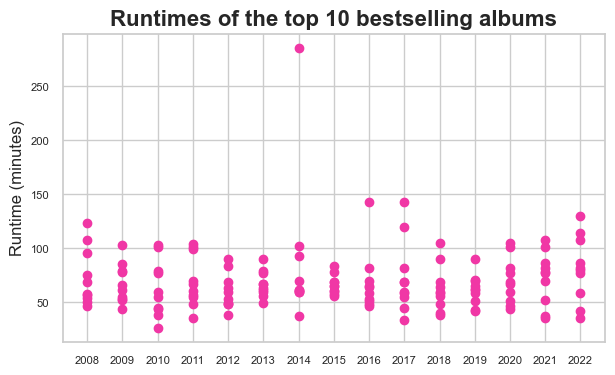

In [86]:
## Plotting the runtimes of the top 10 bestselling albums
fig, ax = plt.subplots()

plt.scatter(x='charting_year', y='runtime', data=topalbums, color='#f037a5', marker='o')
fig.set_size_inches(7, 4)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica Neue']
plt.xticks(np.arange(2008, 2023, 1.0))
ax.tick_params(labelsize=8)

plt.title('Runtimes of the top 10 bestselling albums', fontweight='bold', fontsize=16)
plt.ylabel('Runtime (minutes)', fontsize=12)

sns.set(style='whitegrid')

In [87]:
## Finding the max value
topalbums.loc[topalbums['runtime'].idxmax()]

artist                                                  Garth Brooks
album              Blame It All on My Roots: Five Decades of Infl...
release_year                                                    2013
charting_year                                                   2014
runtime                                                        285.7
tracks                                                          77.0
avg_song_length                                              3.71039
Name: 68, dtype: object

In [88]:
## Calculating mean runtimes
meanruntimes = topalbums.groupby(['charting_year'],as_index=False)['runtime'].mean()
meanruntimes

,charting_year,runtime
0,2008,73.110000
1,2009,67.485000
2,2010,62.413333
3,2011,69.393333
4,2012,59.880000
5,2013,66.710000
6,2014,88.818333
7,2015,65.990000
8,2016,67.656667
9,2017,72.995000


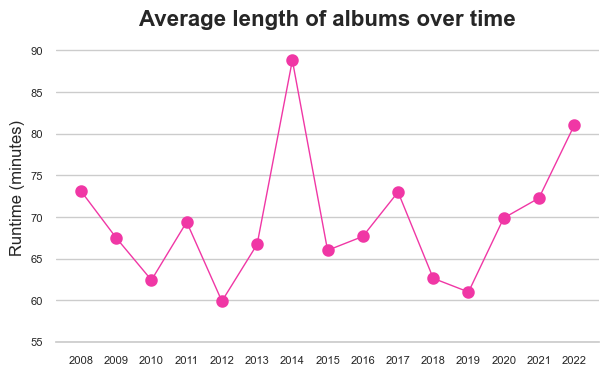

In [89]:
## Plotting a line chart of average album runtime over time
fig, ax = plt.subplots()

meanruntimes.plot(x = 'charting_year', y = 'runtime', linewidth=1.0, c='#f037a5', marker='o', markeredgewidth=3, ax=ax)
fig.set_size_inches(7, 4)
plt.xticks(np.arange(2008, 2023, 1.0))
plt.ylim(55, 92)

plt.title('Average length of albums over time', fontweight='bold', fontsize=16)
plt.xlabel('')
plt.ylabel('Runtime (minutes)', fontsize=12)
ax.tick_params(labelsize=8)
plt.legend('', frameon=False)

sns.set(style='whitegrid')
ax.xaxis.grid(False)
sns.despine(left=True)

Average album runtime has fluctuated over the past 15 years. Most last somewhere between 60 to 75 minutes long, but in 2014 and 2022 they broke the 80 minute mark. 2014's sharp rise is due to an outlier: Garth Brooks' compilation album Blame It All on My Roots: Five Decades of Influences with 77 tracks totalling a runtime of 4 hours and 46 minutes.

### Tracklist length

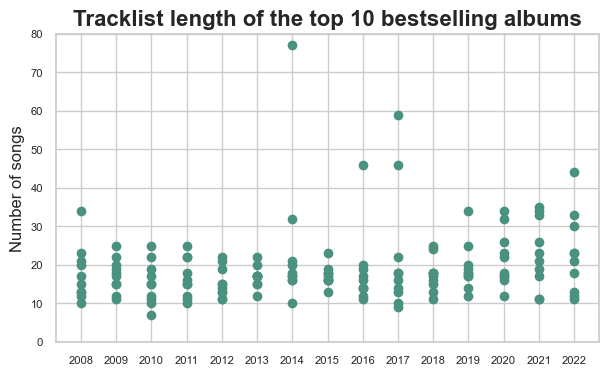

In [90]:
## Plotting the tracklist length of the top 10 bestselling albums
fig, ax = plt.subplots()

plt.scatter(x='charting_year', y='tracks', data=topalbums, color='#4b917f', marker='o')
fig.set_size_inches(7, 4)
plt.xticks(np.arange(2008, 2023, 1.0))
plt.ylim(0, 80)

plt.title('Tracklist length of the top 10 bestselling albums', fontweight='bold', fontsize=16)
plt.ylabel('Number of songs', fontsize=12)
ax.tick_params(labelsize=8)

sns.set(style='whitegrid')

In [92]:
## Calculating mean tracklist length
meantracklists = topalbums.groupby(['charting_year'], as_index=False)['tracks'].mean()
meantracklists

,charting_year,tracks
0,2008,17.8
1,2009,17.4
2,2010,15.3
3,2011,16.6
4,2012,15.4
5,2013,16.9
6,2014,24.4
7,2015,17.2
8,2016,18.3
9,2017,22.5


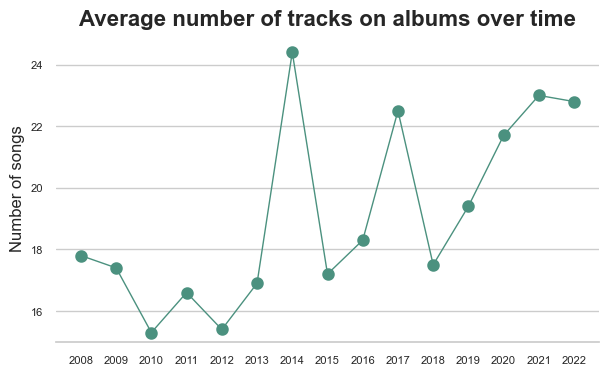

In [93]:
## Plotting a line chart of average tracklist length over time
fig, ax = plt.subplots()

meantracklists.plot(x = 'charting_year', y = 'tracks', linewidth=1.0, c='#4b917f', marker='o', markeredgewidth=3, ax=ax)
fig.set_size_inches(7, 4)
plt.xticks(np.arange(2008, 2023, 1.0))
plt.ylim(15, 25)

plt.title('Average number of tracks on albums over time', fontweight='bold', fontsize=16)
plt.xlabel('')
plt.ylabel('Number of songs', fontsize=12)
ax.tick_params(labelsize=8)
plt.legend('', frameon=False)

sns.set(style='whitegrid')
ax.xaxis.grid(False)
sns.despine(left=True)

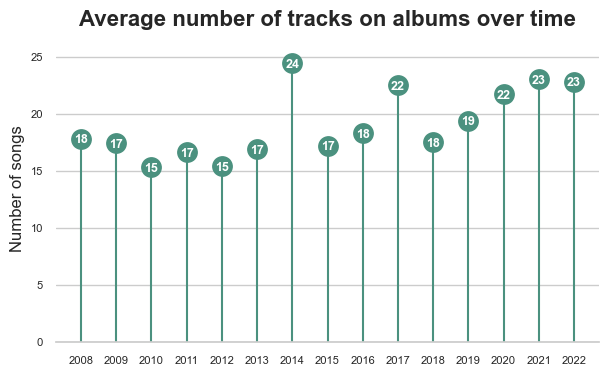

In [94]:
## Plotting a lollipop chart of average tracklist length over time
fig, ax = plt.subplots()

(markerline, stemlines, baseline) = plt.stem(meantracklists['charting_year'],
                                             meantracklists['tracks'])
plt.setp(markerline, marker='o',
         markeredgewidth=9, color='#4b917f')
plt.setp(stemlines, color='#4b917f')
plt.setp(baseline, visible=False)
fig.set_size_inches(7, 4)
plt.xticks(np.arange(2008, 2023, 1.0))
plt.tick_params(labelsize=8)
ax.set_ylim(0, 27)
plt.ylim(bottom=0)

plt.title('Average number of tracks on albums over time', fontweight='bold', fontsize=16)
plt.xlabel('')
plt.ylabel('Number of songs', size=12)
for row in meantracklists.itertuples():
    ax.text(row.charting_year, row.tracks-0.6, s=round(row.tracks), horizontalalignment= 'center', verticalalignment='bottom', color='#ffffff', fontweight='bold', fontsize=9)

plt.margins(y=1) 

## Chart makeover
sns.set(style='whitegrid')
ax.xaxis.grid(False)
sns.despine(left=True)

The average album tracklist has a slightly clearer upward trend, with albums remaining over 20 songs long for the last 3 years.

### Removing the outlier

As Brooks' 2014 compilation skewed the averages for that year, let's see how the charts look when we remove it.

In [95]:
## Dropping the outlier - Garth Brooks' compilation album Blame It All on My Roots: Five Decades of Influences
topalbums.index[topalbums['album'] == 'Blame It All on My Roots: Five Decades of Influences']
new_topalbums = topalbums.drop(68)

In [96]:
## Calculating new mean runtimes
new_meanruntimes = new_topalbums.groupby(['charting_year'],as_index=False)['runtime'].mean()
new_meanruntimes

,charting_year,runtime
0,2008,73.110000
1,2009,67.485000
2,2010,62.413333
3,2011,69.393333
4,2012,59.880000
5,2013,66.710000
6,2014,66.942593
7,2015,65.990000
8,2016,67.656667
9,2017,72.995000


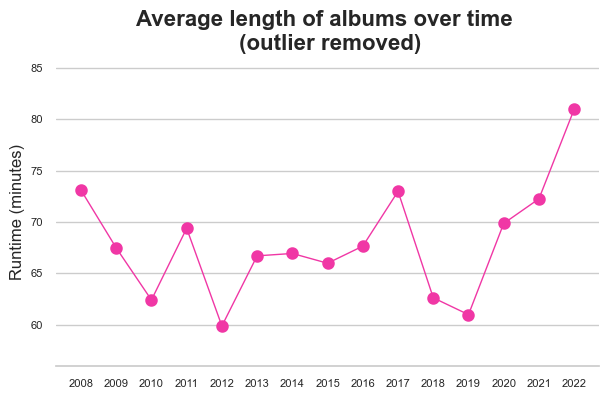

In [97]:
fig, ax = plt.subplots()

new_meanruntimes.plot(x = 'charting_year', y = 'runtime', linewidth=1.0, c='#f037a5', marker='o', markeredgewidth=3, ax=ax)
fig.set_size_inches(7, 4)
plt.xticks(np.arange(2008, 2023, 1.0))
plt.ylim(56, 86)

plt.title('Average length of albums over time \n (outlier removed)', fontweight='bold', fontsize=16)
plt.xlabel('')
plt.ylabel('Runtime (minutes)', fontsize=12)
ax.tick_params(labelsize=8)
plt.legend('', frameon=False)

sns.set(style='whitegrid')
ax.xaxis.grid(False)
sns.despine(left=True)

In [98]:
## Calculating new mean tracklists
new_meantracklists = new_topalbums.groupby(['charting_year'], as_index=False)['tracks'].mean()
new_meantracklists

,charting_year,tracks
0,2008,17.800000
1,2009,17.400000
2,2010,15.300000
3,2011,16.600000
4,2012,15.400000
5,2013,16.900000
6,2014,18.555556
7,2015,17.200000
8,2016,18.300000
9,2017,22.500000


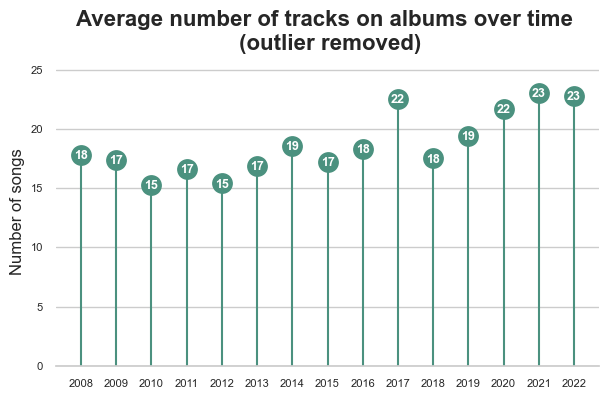

In [99]:
## Plotting a lollipop chart of average tracklist length over time (outlier removed)
fig, ax = plt.subplots()

(markerline, stemlines, baseline) = plt.stem(new_meantracklists['charting_year'],
                                             new_meantracklists['tracks'])
plt.setp(markerline, marker='o',
         markeredgewidth=9, color='#4b917f')
plt.setp(stemlines, color='#4b917f')
plt.setp(baseline, visible=False)
fig.set_size_inches(7, 4)
plt.xticks(np.arange(2008, 2023, 1.0))
plt.tick_params(labelsize=8)
ax.set_ylim(0, 26)
plt.ylim(bottom=0)

plt.title('Average number of tracks on albums over time \n (outlier removed)',  fontweight='bold', fontsize=16)
plt.xlabel('')
plt.ylabel('Number of songs', size=12)
for row in new_meantracklists.itertuples():
    ax.text(row.charting_year, row.tracks-0.6, s=round(row.tracks), horizontalalignment= 'center', verticalalignment='bottom', color='#ffffff', fontweight='bold', fontsize=9)

plt.margins(y=1) 

## Chart makeover
sns.set(style='whitegrid')
ax.xaxis.grid(False)
sns.despine(left=True)

Without the outlier, 2022 becomes the year when album runtimes had a notable increase while tracklists have a steadier growth trend over time.

## Conclusion

Songs are getting shorter and albums are getting longer — at least in terms of tracklist numbers. Album runtimes have been more varied, but it will be interesting to see where they go after the significant increase last year. 

It’s also important to note that this dataset was limited to top charting US hits. Given more time, I would’ve expanded on the data by including more songs and albums. I’d also love to investigate how music trends differ between genres (although music genres are now often contested) or conduct similar analyses with UK or global chart data in future.